<a href="https://colab.research.google.com/github/mohanrajmit/Rainstreaks_Removal/blob/main/LP_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mohanrajmit/Rainstreaks_Removal.git

Cloning into 'Rainstreaks_Removal'...
remote: Enumerating objects: 267, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 267 (delta 46), reused 253 (delta 41), pack-reused 0
Receiving objects: 100% (267/267), 25.93 MiB | 26.31 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
cd /content/Rainstreaks_Removal/alpr-unconstrained-master/darknet

/content/Rainstreaks_Removal/alpr-unconstrained-master/darknet


In [3]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-er

In [4]:
cd ..

/content/Rainstreaks_Removal/alpr-unconstrained-master


In [5]:
!ls

annotation-tool.py  get-networks.sh		README.md  train-detector.py
create-model.py     LICENSE			run.sh	   vehicle-detection.py
darknet		    license-plate-detection.py	samples
gen-outputs.py	    license-plate-ocr.py	src


In [6]:
import sys, os
import keras
import cv2
import traceback

from src.keras_utils 			import load_model
from glob 						import glob
from os.path 					import splitext, basename
from src.utils 					import im2single
from src.keras_utils 			import load_model, detect_lp
from src.label 					import Shape, writeShapes

In [7]:
def adjust_pts(pts,lroi):
	return pts*lroi.wh().reshape((2,1)) + lroi.tl().reshape((2,1))

In [48]:


lp_threshold = .5

wpod_net_path = "/content/Rainstreaks_Removal/data/lp-detector/wpod-net_update1.json"
wpod_net = load_model(wpod_net_path)

imgs_paths = "/content/Rainstreaks_Removal/20.png"

#print 'Searching for license plates using WPOD-NET'


print('\t Processing %s' % imgs_paths)

bname = splitext(basename(imgs_paths))[0]
Ivehicle = cv2.imread(imgs_paths)

ratio = float(max(Ivehicle.shape[:2]))/min(Ivehicle.shape[:2])
side  = int(ratio*288.)
bound_dim = min(side + (side%(2**4)),608)
print("\t\tBound dim: %d, ratio: %f" % (bound_dim,ratio))

Llp,LlpImgs,_ = detect_lp(wpod_net,im2single(Ivehicle),bound_dim,2**4,(240,80),lp_threshold)

if len(LlpImgs):
  Ilp = LlpImgs[0]
  Ilp = cv2.cvtColor(Ilp, cv2.COLOR_BGR2GRAY)
  Ilp = cv2.cvtColor(Ilp, cv2.COLOR_GRAY2BGR)

  s = Shape(Llp[0].pts)

  cv2.imwrite('output_lpdetect.png',Ilp*255.)
  #writeShapes('%s/%s_lp.txt' % (output_dir,bname),[s])




	 Processing /content/Rainstreaks_Removal/20.png
		Bound dim: 446, ratio: 1.499118


In [49]:
import matplotlib.pyplot as plt 

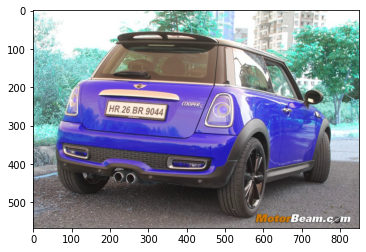

In [50]:
 plt.imshow(Ivehicle)    

In [51]:
output_img=cv2.imread("/content/Rainstreaks_Removal/alpr-unconstrained-master/output_lpdetect.png")

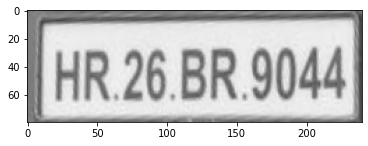

In [52]:
plt.imshow(output_img)  